In [37]:
import pandas as pd
from scipy import stats
df=pd.read_excel('phoenix_data.xlsx',index_col=0)
df.shape

(219, 14)

In [84]:
df

,Gender,ssc_%,ssc_board,hsc_%,hsc_board,hsc_stream,degree_%,degree_domain,work_experience,entrance_score,specialization,mba_%,status,compensation
Index,,,,,,,,,,,,,,
1001,M,67.00,Others,91.00,Others,Commerce,58.00,Science & Technology,No,55.0,Marketing & Human Resources,58.80,Placed,270000.0
1002,M,79.33,Central,78.33,Others,Science,77.48,Science & Technology,Yes,86.5,Marketing & Finance,66.28,Placed,200000.0
1003,M,65.00,Central,68.00,Central,Arts,64.00,Commerce & Management,No,75.0,Marketing & Finance,57.80,Placed,250000.0
1004,M,56.00,Central,52.00,Central,Science,52.00,Science & Technology,No,66.0,Marketing & Human Resources,59.43,Not Placed,NaN
1005,M,85.80,Central,73.60,Central,Commerce,73.30,Commerce & Management,No,96.8,Marketing & Finance,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,M,80.60,Others,82.00,Others,Commerce,77.60,Commerce & Management,No,91.0,Marketing & Finance,74.49,Placed,400000.0
1212,M,58.00,Others,60.00,Others,Science,72.00,Science & Technology,No,74.0,Marketing & Finance,53.62,Placed,275000.0
1213,M,67.00,Others,67.00,Others,Commerce,73.00,Commerce & Management,Yes,59.0,Marketing & Finance,69.72,Placed,295000.0


In [10]:
print(df.columns)
df=df.drop(["compensation"],axis=1)
catcoll = ['Gender','hsc_stream','degree_domain', 'work_experience','specialization','status']
histcoll=['ssc_%', 'hsc_%','degree_%', 'mba_%']

Index(['Gender', 'ssc_%', 'ssc_board', 'hsc_%', 'hsc_board', 'hsc_stream',
       'degree_%', 'degree_domain', 'work_experience', 'entrance_score',
       'specialization', 'mba_%', 'status', 'compensation'],
      dtype='object')


In [11]:

for col in catcoll:
    unique_values =  df[col].unique()
    #print(unique_values)
    #for u in list(unique_values):
    #    print(u)
    df[[col]] = df[[col]].apply(lambda col:pd.Categorical(col).codes)
df.corr()['status'][:]


Gender             0.098525
ssc_%              0.603821
hsc_%              0.496813
hsc_stream         0.024592
degree_%           0.480088
degree_domain     -0.029909
work_experience    0.270758
entrance_score     0.135468
specialization    -0.249493
mba_%              0.088734
status             1.000000
Name: status, dtype: float64

In [12]:
df.iloc[42:55,:]

,Gender,ssc_%,ssc_board,hsc_%,hsc_board,hsc_stream,degree_%,degree_domain,work_experience,entrance_score,specialization,mba_%,status
Index,,,,,,,,,,,,,
1042,0,74.00,Others,63.16,Others,1,65.0,0,1,65.0,1,69.76,0
1043,1,49.00,Others,39.00,Central,2,65.0,1,0,63.0,0,51.21,0
1044,1,87.00,Others,87.00,Others,1,68.0,0,0,95.0,1,62.90,1
1045,0,77.00,Others,73.00,Others,1,81.0,0,1,89.0,0,69.70,1
1046,0,76.00,Central,64.00,Central,2,72.0,2,0,58.0,1,66.53,0
1047,0,70.89,Others,71.98,Others,2,65.6,0,0,68.0,1,71.63,0
1048,1,63.00,Central,60.00,Central,1,57.0,0,1,78.0,0,54.55,1
1049,1,63.00,Others,62.00,Others,1,68.0,0,0,64.0,0,62.46,1
1050,0,50.00,Others,37.00,Others,0,52.0,1,0,65.0,1,56.11,0


In [13]:
!pip install seaborn

NameError: name 'res' is not defined

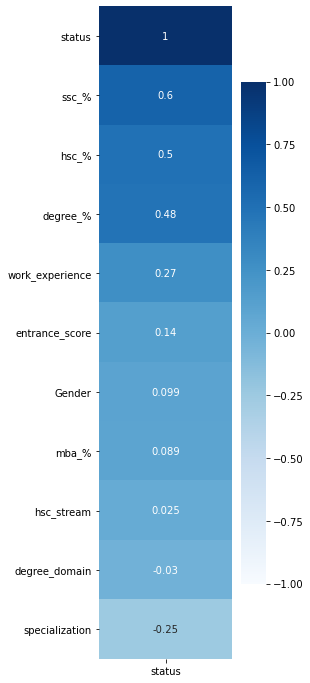

In [14]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
#stats.pointbiserialr(df['status'],df['ssc_%'])
plt.figure(figsize=(3,12))
sn.heatmap(df.corr()[['status']].sort_values(by=['status'],ascending=False),
            vmin=-1,
            cmap='Blues',
            annot=True,
          );
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
sn.set(font_scale=2)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
X=df[['ssc_%','hsc_%','degree_%']]
y=df['status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
#logreg.fit(np.array(X_train).reshape(-1, 1),np.array(y_train).reshape(-1, 1))

logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [34]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8181818181818182
Precision: 0.8536585365853658
Recall: 0.8974358974358975


In [65]:
y_pred_prob_df = pd.DataFrame(logreg.predict_proba(X))

In [85]:
df_logitic_probabity=df.loc[:,['ssc_%','hsc_%','degree_%']]
df_logitic_probabity['placement probaility']=np.array(y_pred_prob_df.iloc[:,1])
df_logitic_probabity['status']=df.loc[:,['status']]
df_logitic_probabity['compensation']=df.loc[:,['compensation']].fillna(0)
df_logitic_probabity['work_experience']=df.loc[:,['work_experience']]

In [86]:
print(df_logitic_probabity)

       ssc_%  hsc_%  degree_%  placement probaility      status  compensation  \
Index                                                                           
1001   67.00  91.00     58.00              0.957625      Placed      270000.0   
1002   79.33  78.33     77.48              0.994599      Placed      200000.0   
1003   65.00  68.00     64.00              0.750635      Placed      250000.0   
1004   56.00  52.00     52.00              0.059109  Not Placed           0.0   
1005   85.80  73.60     73.30              0.994378      Placed      425000.0   
...      ...    ...       ...                   ...         ...           ...   
1211   80.60  82.00     77.60              0.996853      Placed      400000.0   
1212   58.00  60.00     72.00              0.536502      Placed      275000.0   
1213   67.00  67.00     73.00              0.889901      Placed      295000.0   
1214   74.00  66.00     58.00              0.816095      Placed      204000.0   
1215   62.00  58.00     53.0

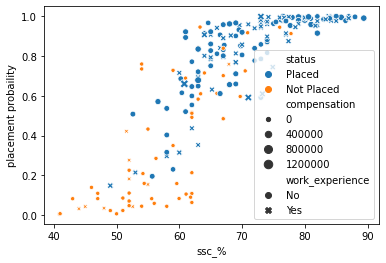

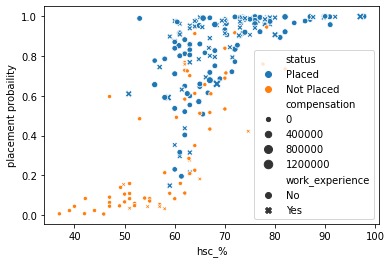

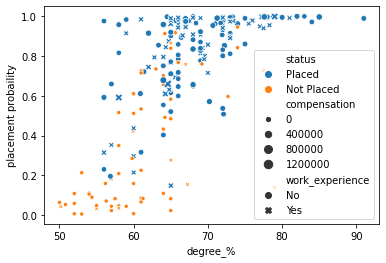

In [87]:
params=['ssc_%','hsc_%','degree_%']

for p in params:
    sn.scatterplot(x=p, y='placement probaility', hue='status', size='compensation',style='work_experience',data=df_logitic_probabity)
    plt.show()

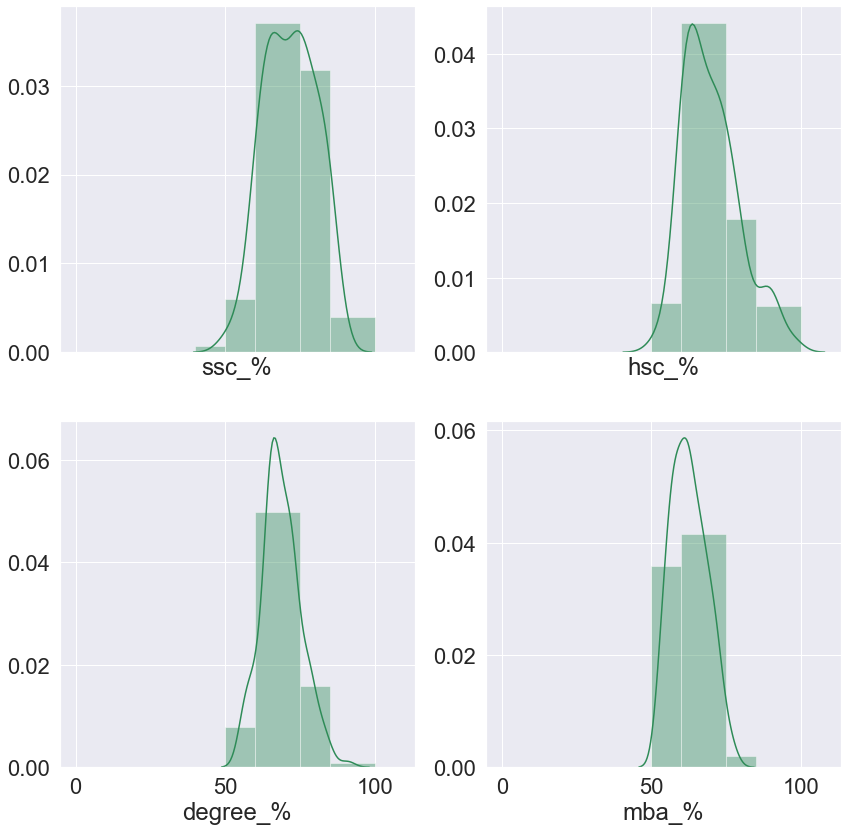

In [20]:
import matplotlib.pyplot as plt
df_placed=df[df['status']==1]
f, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True)

sn.set(font_scale=3)
axeses=[[0,0],[0,1],[1,0],[1,1]]
for col2,axs in zip(histcoll,axeses):
    sn.distplot( df_placed[col2] ,norm_hist=False, color = 'seagreen', label=str(col2), ax=axes[axs[0],axs[1]], bins=[0,30,40,50,60,75,85,100])
    
plt.show()
    
    



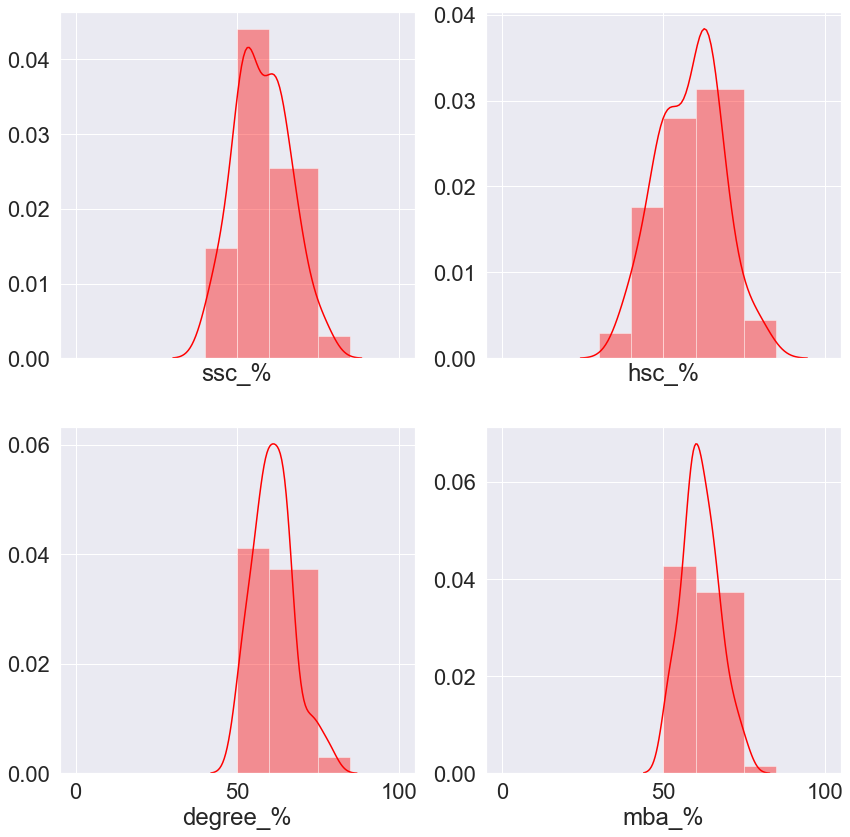

In [12]:
# df_unplaced=df[df['status']==0]

# sn.set(font_scale=2)
# for col2 in histcoll:
#     plt.figure(figsize=(12,12))
#     sn.distplot( df_unplaced[col2] , color = 'Skyblue',label=str(col2))
#     plt.legend()
#     plt.show()
    
df_unplaced=df[df['status']==0]
f, axes = plt.subplots(2, 2, figsize=(14,14), sharex=True)

sn.set(font_scale=3)
axeses=[[0,0],[0,1],[1,0],[1,1]]
for col2,axs in zip(histcoll,axeses):
    sn.distplot( df_unplaced[col2] ,norm_hist=False, color = 'red', label=str(col2), ax=axes[axs[0],axs[1]], bins=[0,30,40,50,60,75,85,100])
    
plt.show()

In [118]:
df_placed.describe()

,Gender,ssc_%,hsc_%,hsc_stream,degree_%,degree_domain,work_experience,entrance_score,specialization,mba_%,status
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.0
mean,0.675497,71.768278,70.053841,1.384106,68.838411,0.589404,0.423841,73.365762,0.364238,62.687285,1.0
std,0.469747,8.745237,9.379247,0.575742,6.565254,0.896449,0.495810,13.648660,0.482817,5.938323,0.0
min,0.000000,49.000000,50.830000,0.000000,56.000000,0.000000,0.000000,50.000000,0.000000,52.380000,1.0
25%,0.000000,65.000000,63.000000,1.000000,65.000000,0.000000,0.000000,60.500000,0.000000,57.850000,1.0
50%,1.000000,73.000000,68.400000,1.000000,68.000000,0.000000,0.000000,72.000000,0.000000,62.280000,1.0
75%,1.000000,78.750000,75.500000,2.000000,72.615000,2.000000,1.000000,85.000000,1.000000,66.910000,1.0
max,1.000000,89.400000,97.700000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.0


In [119]:
df_unplaced.skew(axis = 0, skipna = True)

Gender            -0.304100
ssc_%              0.174021
hsc_%             -0.013314
hsc_stream        -0.393634
degree_%           0.558105
degree_domain      0.768051
work_experience    2.038333
entrance_score     0.568431
specialization    -0.561457
mba_%              0.277411
status             0.000000
dtype: float64

In [120]:
df_placed.skew(axis = 0, skipna = True)

Gender            -0.757226
ssc_%             -0.074284
hsc_%              0.764498
hsc_stream        -0.277988
degree_%           0.413603
degree_domain      0.909093
work_experience    0.311334
entrance_score     0.132418
specialization     0.569921
mba_%              0.324292
status             0.000000
dtype: float64

In [121]:

# df_placed=df_placed.drop(["ssc_board"],axis=1)
# df_placed=df_placed.drop(["hsc_board"],axis=1)


In [122]:
df_placed.dtypes

Gender                int8
ssc_%              float64
hsc_%              float64
hsc_stream            int8
degree_%           float64
degree_domain         int8
work_experience       int8
entrance_score     float64
specialization        int8
mba_%              float64
status                int8
dtype: object

In [123]:
# df_unplaced=df_unplaced.drop(["ssc_board"],axis=1)
# df_unplaced=df_unplaced.drop(["hsc_board"],axis=1)


In [150]:

z_placed=(stats.zscore(df_placed[['ssc_%','hsc_%', 'degree_%','mba_%','work_experience']]))
z_unplaced= (stats.zscore(df_unplaced[['ssc_%','hsc_%', 'degree_%','mba_%','work_experience']]))
df_placed_oulier = df_placed[(z_placed < -0.8).all(axis=1)]
df_unplaced_oulier = df_unplaced[(z_unplaced > 0).all(axis=1)]
print(df_placed_oulier)
print(df_unplaced_oulier)

       Gender  ssc_%  hsc_%  hsc_stream  degree_%  degree_domain  \
Index                                                              
1113        1   58.0   61.0           1      61.0              0   
1177        0   59.0   60.0           1      56.0              0   

       work_experience  entrance_score  specialization  mba_%  status  
Index                                                                  
1113                 0            58.0               1  53.94       1  
1177                 0            55.0               1  57.90       1  
       Gender  ssc_%  hsc_%  hsc_stream  degree_%  degree_domain  \
Index                                                              
1042        0   74.0  63.16           1      65.0              0   
1168        1   67.9  62.00           2      67.0              2   

       work_experience  entrance_score  specialization  mba_%  status  
Index                                                                  
1042                 1